In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import Normailzer
import seaborn as sns

In [3]:
df=pd.read_csv('fraudTrain.csv')

In [4]:
df.head(10000000)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
#count all the values in the class column
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [6]:

#drop city
df.drop('state', axis=1, inplace=True)

In [7]:
df.drop('city', axis=1, inplace=True)

In [8]:
df.drop(['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long'], axis=1, inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['trans_num'] = encoder.fit_transform(df['trans_num'])


(array([1289169.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,    7506.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

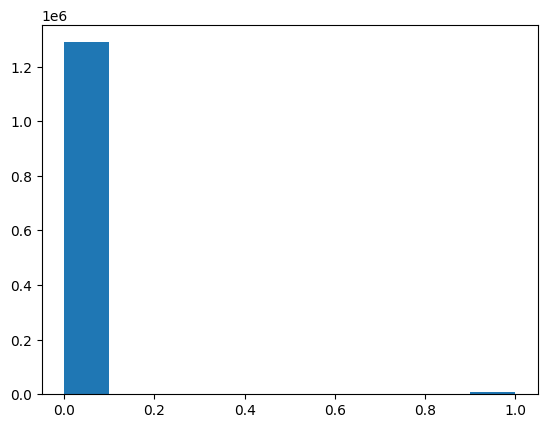

In [10]:
plt.hist(df['is_fraud'], bins=10)

C:\Users\basim\AppData\Local\Temp\ipykernel_14280\2547128853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='hls')


<Axes: xlabel='is_fraud', ylabel='count'>

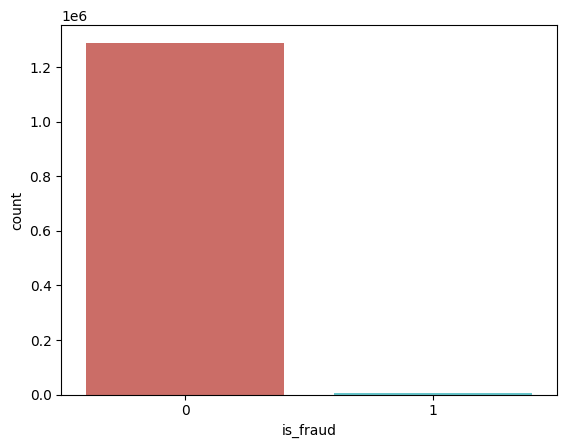

In [11]:
sns.countplot(x='is_fraud', data=df, palette='hls')

In [12]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)



In [14]:
X_resampled

,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time
0,0,2703186189652095,4.97,28654,3495,56438,1325376018
1,1,630423337322,107.23,99160,149,159395,1325376044
2,2,38859492057661,220.11,83252,4154,818703,1325376051
3,3,3534093764340240,45.00,59632,1939,544575,1325376076
4,4,375534208663984,41.96,24433,99,831111,1325376186
...,...,...,...,...,...,...,...
2578333,285082,2720433095629877,320.87,4287,3224,1277845,1337510499
2578334,136016,6011148190095209,513.60,94015,107941,419155,1331861227
2578335,908990,4715741951931168768,6.51,74633,471,468185,1356732259
2578336,815276,584673555952,275.98,58531,307,657382,1354925873


In [15]:
y_resampled

0          0
1          0
2          0
3          0
4          0
          ..
2578333    1
2578334    1
2578335    1
2578336    1
2578337    1
Name: is_fraud, Length: 2578338, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
X_train

,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time
2405787,122726,343472729187663,18.93,3816,1368,1223279,1331337126
1614448,641218,346273234529002,10.23,24970,4575,991183,1348956509
1366567,502554,213157767990030,227.13,82901,27971,45841,1344210187
2138973,778232,4736845434667908096,588.24,12910,2148,987873,1354226899
356496,356496,3514865930894695,98.02,88325,899,1088265,1339800095
...,...,...,...,...,...,...,...
110268,110268,6528911529051375,72.38,54896,1478,1149562,1330829368
1692743,667423,4633065159406313,818.00,2908,203571,618432,1349997177
2356330,83944,340953839692349,336.72,48088,134056,270345,1329611297
2229084,1208674,30143535920989,442.43,8014,504,318000,1369003326


In [18]:
# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model



In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [22]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10


64459/64459 [==============================] - 86s 1ms/step - loss: 0.2973 - accuracy: 0.8711 - val_loss: 0.2619 - val_accuracy: 0.8831
Epoch 2/10
64459/64459 [==============================] - 83s 1ms/step - loss: 0.2498 - accuracy: 0.8897 - val_loss: 0.2359 - val_accuracy: 0.8956
Epoch 3/10
64459/64459 [==============================] - 89s 1ms/step - loss: 0.2380 - accuracy: 0.8951 - val_loss: 0.2379 - val_accuracy: 0.8973
Epoch 4/10
64459/64459 [==============================] - 108s 2ms/step - loss: 0.2303 - accuracy: 0.8987 - val_loss: 0.2256 - val_accuracy: 0.9012
Epoch 5/10
64459/64459 [==============================] - 83s 1ms/step - loss: 0.2242 - accuracy: 0.9014 - val_loss: 0.2160 - val_accuracy: 0.9067
Epoch 6/10
64459/64459 [==============================] - 87s 1ms/step - loss: 0.2184 - accuracy: 0.9039 - val_loss: 0.2137 - val_accuracy: 0.9061
Epoch 7/10
64459/64459 [==============================] - 83s 1ms/step - loss: 0.2136 - accuracy: 0.9061 - val_loss

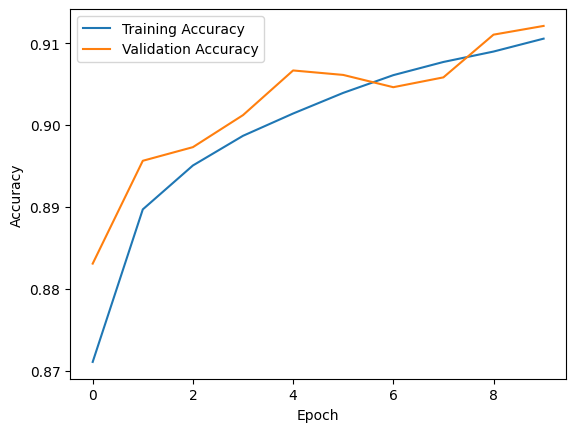

In [34]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


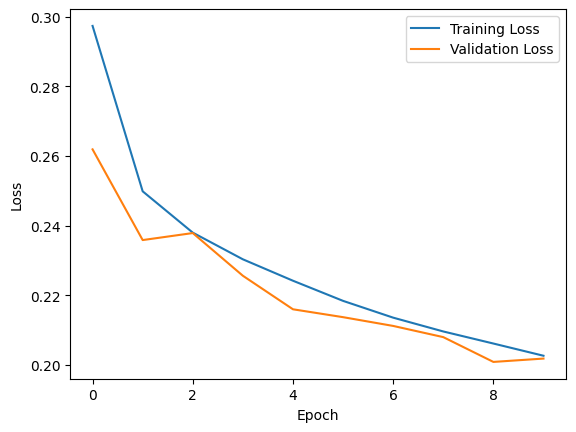

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


16115/16115 [==============================] - 16s 970us/step - loss: 0.2018 - accuracy: 0.9121
Test Loss: 0.20184262096881866
Test Accuracy: 0.9121043086051941


In [20]:
import pickle

# Save the model to a file
with open('ANNmodel.pkl', 'wb') as file:
    pickle.dump(model, file)


In [21]:
#import the model
with open('ANNmodel.pkl', 'rb') as file:
    model = pickle.load(file)

In [22]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)



In [23]:
X_test_scaled_df.head(100)

,Unnamed: 0,cc_num,amt,zip,city_pop,trans_num,unix_time
0,-0.600292,-0.315596,-0.772823,-1.549301,-0.278190,0.649887,-0.571031
1,-1.288081,-0.313134,-0.603493,-1.241432,-0.290869,1.057596,-1.267812
2,1.465234,-0.315598,1.837131,-1.250886,-0.265059,-1.100805,1.504857
3,0.937639,-0.313133,-0.688609,1.158182,-0.295419,0.350792,0.903403
4,-0.086971,-0.315599,1.503563,1.796075,-0.295301,-0.945073,-0.094761
...,...,...,...,...,...,...,...
95,-1.336011,-0.312696,-0.033382,-0.438102,-0.206947,0.266911,-1.321121
96,-0.334973,-0.311236,-0.690015,1.880640,-0.283770,-0.469225,-0.331181
97,-0.707486,-0.315598,-0.771656,-0.008187,-0.195220,1.549421,-0.666293
98,-0.337734,3.446520,-0.644314,0.826384,-0.263433,-1.712237,-0.334418


In [45]:
# Take input from the user
input_data = []

# Prompt the user for input
for feature in X.columns:
    value = input(f"Enter the value for {feature}: ")
    input_data.append(float(value))

# Convert the input data into a numpy array
input_data = np.array(input_data).reshape(1, -1)

# Scale the input data using the same scaler used for training
input_data_scaled = scaler.transform(input_data)

# Make predictions using the model
prediction = model.predict(input_data_scaled)
if(prediction[0][0] > 0.5):
    print("Fraudulent Transaction")
else:
    print("Legitimate Transaction")
    
# Print the predicted value
print(f"The predicted value is: {prediction[0][0]}")



1/1 [==============================] - 0s 87ms/step
Fraudulent Transaction
The predicted value is: 0.9996104836463928


c:\Users\basim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
